# Logistic Regression

Voorbeeld en oefeningen met classificatie ML-vraagstukken en validatie metrieken.

- Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)

#### Bronmateriaal
- Heaton, Jeff. [Binary Classification: Understanding AUC, ROC, Precision/Recall & Sensitivity/Specificity](https://www.youtube.com/watch?v=oT2KFUxlclA)
- Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow*. O’Reilly Media.

In [2]:
%matplotlib inline

import os
import pandas as pd 
import numpy as np

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# deze code vindt je ook in de vorige lessen ... 
# het is bedoeld om wat defaults te zetten voor het plotten
# ook om een std functie te hebben om plaatjes weg te schrijven naar de sub directory /images
from pathlib import Path

# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Create the `images/classification` folder
IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# helper function: load CSV data
import os
def load_csv_pd_data(path, filename):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_csv(csv_path)


---

## Iris classification

Dataset: `iris.csv`


In [4]:
# import dataset
# load the dataset using a helper function 
iris = load_csv_pd_data("./data", "iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# Dus er zijn 5 kolommen met aparte namen
# Volgens de documentatie gaat het om sepal length, sepal width, petal length, petal width and species
iris.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
# En hoewel het lijkt alsof er maar 1 soort is (species) dit is niet zo
# we maken nu een dataset waarbij we gaan classificeren op kolom 1 en kolom 2 (features) met als uitkomst kolom 4 (species = label)

X = iris.values[:, :2]  # we only take the first two features.
# laat de eerste 10 rijen zien
print(X[0:10])

[[4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]]


In [7]:
# Maak ook een Numpy array met de uitkomsten
y = iris.values[:, 4]   # target
# toon de rijen 40 t/m 60
print (y[40:60])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']


In [8]:
# Dus nu gaan we een logistische classifier trianen 
# Dus denk ik even aan het college ... dit is een classifier met 2 features dus ax1 + bx2 + c = 0
# x1 is de 1e feature  en x2 is de 2e feature; c is de bias
# Het model moet de soort/"species" gaan voorspellen o.b.v. deze 2 kenmerken
 
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)

# Voor de duidelijkheid ... alleen de parameter C wordt aangepast, de rest blijft op default staan.
# C is in dit geval de Regularization parameter (zie de uitleg bij de functie)
# Default is deze waarde 1 maar door deze echt hoog te zetten beperk je overfitting. 

# Uiteindelijk trainen we door de FIT functie aan te roepen met features = X en uitkomsten = y
logreg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


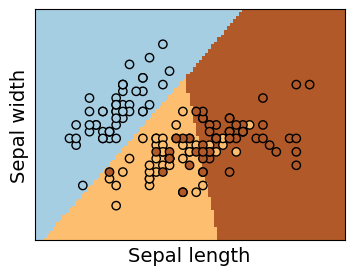

In [9]:
# De code hieronder visualiseert de beslissingsgrens van een logistische regressie-classifier op een dataset (bijvoorbeeld de Iris-dataset)
# en plaatst de trainingspunten bovenop die beslissingsgrens. 
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,     # het geleerde model
    X,          # dataset
    cmap=plt.cm.Paired,         # kleurcodering
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",             # verbeter de weergave van de beslissingsgrens zodat de overgangen soepel zijn
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points, each classification in a different color
# Maar omdat de doelvariabele y categorische waarden heeft (bijvoorbeeld Iris-soorten zoals "setosa", "versicolor", "virginica"),
# gebruik je LabelEncoder om deze om te zetten naar numerieke waarden ([0,1,2][0,1,2]). 
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
species_encoded=encoding.fit(y).transform(y)
# DEBUG: print(species_encoded)

plt.scatter(X[:, 0], X[:, 1], 
            c=species_encoded, edgecolors="k", 
            cmap=plt.cm.Paired
           )

plt.xticks(())
plt.yticks(())

plt.show()

## Oefening Irisi dataset - kies twee andere features

Zoals je ziet aan plot, is de classificatie op basis van 2 features niet zo best.
Neem twee andere features, bijv. `petal length` en `petal width`, en kijk of je een betere fit krijgt.

1. Bewijs dat met een plot zoals in bovenstaand voorbeeld is gedaan.
> - experimenteer met andere twee features, bijv. `sepal width` en `petal length`.
> - experimenteer met de hyperparameters, bijv `solver`. Reflecteer op resultaat.
2. Bereken/plot de classificatie performance metrieken.

In [10]:
# hier komt jouw code ...
